# The Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new) # predicts True and False for these 2 flowers

In [2]:
y_pred

array([ True, False])

# Regression MLPs

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(
    StandardScaler(),
    mlp_reg
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)
rmse

0.5053326657968444

# Classification MLPs

In [4]:
from sklearn.neural_network import MLPClassifier

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris setosa

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[10], max_iter=10_000, random_state=42)
pipeline = make_pipeline(
    StandardScaler(),
    mlp_clf
)

pipeline.fit(X_train, y_train)

score = pipeline.score(X_valid, y_valid)
score

1.0

# Implementing MLPs with Keras

## Image classifier with Sequential API

In [5]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

2025-09-30 17:37:47.797977: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
X_train.shape

(55000, 28, 28)

In [7]:
X_train.dtype

dtype('uint8')

In [8]:
# Scale the pixel intensities to 0-1 range
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
1 - X_train[0]

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.    

In [11]:
y_train[0]

9

In [12]:
class_names[y_train[0]]

'Ankle boot'

In [13]:
import matplotlib.pyplot as plt

def plot_fashion(data, labels):
    nrows = 4
    ncols = 10
    plt.figure(figsize=(ncols * 1.2, nrows * 1.2))

    data = data.reshape(-1, 28, 28)
    for index, (image, label_index) in enumerate(zip(data, labels)):
        label = class_names[label_index]
        plt.subplot(nrows, ncols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.title(label)
        plt.axis("off")

    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

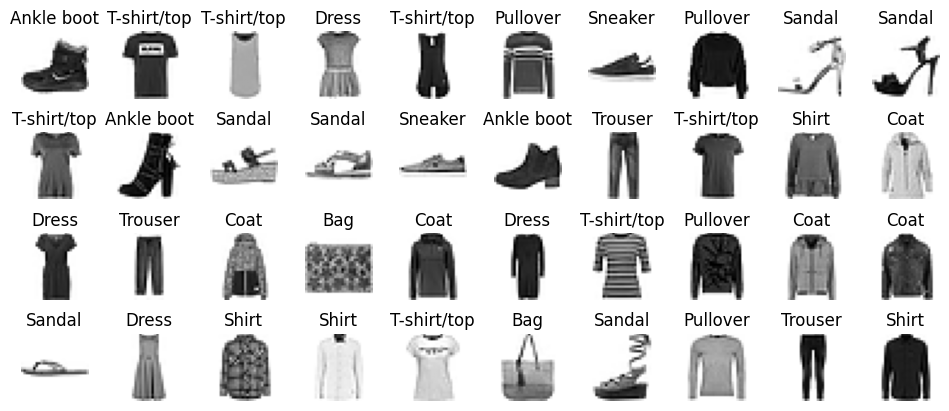

In [14]:
plot_fashion(X_train[:40], y_train[:40])

## Creating the model using the sequential API

In [15]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax")) # Exclusion classes (1 neuron per unique class)

W0000 00:00:1759264671.121878     685 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [16]:
# Compact version of the previous code
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

/home/julio/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [19]:
weights, biases = model.get_layer("dense_3").get_weights()

In [20]:
weights

array([[ 0.03630355, -0.01613712,  0.06467505, ...,  0.06065167,
        -0.06066499, -0.05110481],
       [ 0.00401745,  0.03742158, -0.03228864, ...,  0.03041389,
         0.05237062,  0.02827815],
       [ 0.013156  , -0.06059238, -0.01634522, ...,  0.04148572,
        -0.06467056,  0.06523269],
       ...,
       [-0.02181808, -0.0483891 , -0.05351486, ...,  0.05894306,
        -0.03926804,  0.05094706],
       [ 0.05626997, -0.00732605,  0.01273005, ...,  0.03561012,
         0.06059828, -0.0281629 ],
       [-0.04261895, -0.04673174,  0.06166121, ..., -0.0711849 ,
         0.05766337,  0.02649633]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
biases.shape

(300,)

## Compiling the model

In [24]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

## Training and evaluating the model

In [25]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7655 - loss: 0.7188 - val_accuracy: 0.8254 - val_loss: 0.5078
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8307 - loss: 0.4869 - val_accuracy: 0.8342 - val_loss: 0.4559
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8458 - loss: 0.4412 - val_accuracy: 0.8434 - val_loss: 0.4304
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8549 - loss: 0.4130 - val_accuracy: 0.8482 - val_loss: 0.4149
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8618 - loss: 0.3916 - val_accuracy: 0.8522 - val_loss: 0.4028
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8675 - loss: 0.3744 - val_accuracy: 0.8574 - val_loss: 0.3935
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8721 - loss: 0.3604 - val_accuracy: 0.8604 - val_loss: 0.3856
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8758 - loss: 0.3483 - 

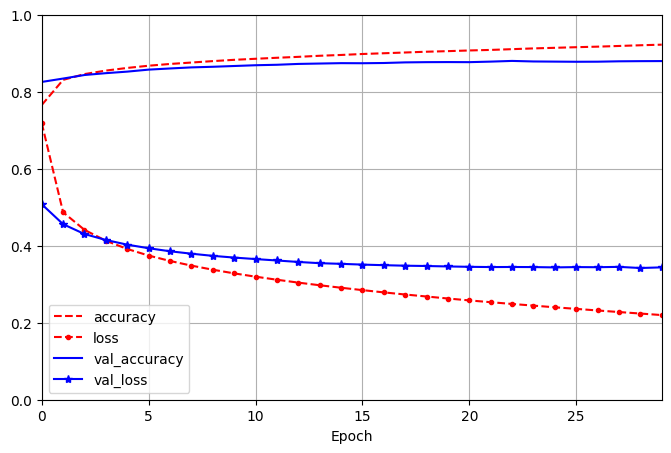

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# xlim: 0-29 -> there are 30 epochs
# ylim: 0-1 -> just because the values ranges from 0 to 1
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

In [27]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.8743 - loss: 0.3598


[0.35981112718582153, 0.8743000030517578]

## Using the model to make predictions

In [28]:
X_new = X_test[:3] # Use the first three instances as if they were unknown
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.37, 0.  , 0.01, 0.  , 0.62],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [29]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [30]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [31]:
y_test[:3] # The actual three instances
# They have the same values, so the predictions are correct

array([9, 2, 1], dtype=uint8)

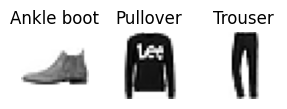

In [32]:
plot_fashion(X_new, y_pred)

# Building a Regression MLP using the sequential API

In [33]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [34]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1),
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test, rmse_test = model.evaluate(X_test, y_test)

Epoch 1/20


/home/julio/.local/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.8953 - loss: 0.8016 - val_RootMeanSquaredError: 0.6538 - val_loss: 0.4275
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6319 - loss: 0.3993 - val_RootMeanSquaredError: 0.7227 - val_loss: 0.5223
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6012 - loss: 0.3614 - val_RootMeanSquaredError: 1.1802 - val_loss: 1.3930
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5781 - loss: 0.3341 - val_RootMeanSquaredError: 0.5603 - val_loss: 0.3139
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5757 - loss: 0.3315 - val_RootMeanSquaredError: 1.5105 - val_loss: 2.2817
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5624 - loss: 0.3163 - val_RootMeanSquaredError: 1.2819 - val_loss: 1.6432
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5700 - loss: 0.3249 -

In [35]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0.3530162],
       [1.1507428],
       [4.9890256]], dtype=float32)

In [36]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,822 (65.72 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

 Optimizer params: 11,204 (43.77 KB)

# Building complex models using the functional API

## 2 different paths that converge at the end

In [38]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [39]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 8)         │         17 │ input_layer_3[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 30)        │        270 │ normalization_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 30)        │        930 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization_1[… │
│ (Concatenate)       │                   │            │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [40]:
model.compile(loss="mse", metrics=["RootMeanSquaredError"])

In [41]:
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test, rmse_test = model.evaluate(X_test, y_test)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 1.0485 - loss: 1.0993 - val_RootMeanSquaredError: 0.8240 - val_loss: 0.6789
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6637 - loss: 0.4406 - val_RootMeanSquaredError: 1.3579 - val_loss: 1.8439
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6382 - loss: 0.4073 - val_RootMeanSquaredError: 1.3877 - val_loss: 1.9257
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6232 - loss: 0.3883 - val_RootMeanSquaredError: 1.2167 - val_loss: 1.4804
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6129 - loss: 0.3756 - val_RootMeanSquaredError: 1.0440 - val_loss: 1.0899
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6040 - loss: 0.3648 - val_RootMeanSquaredError: 0.9186 - val_loss: 0.8439
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5978 - los

## 2 different paths from 2 different inputs

In [42]:
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [43]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_3     │ (None, 6)         │         13 │ input_layer_5[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 30)        │        210 │ normalization_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 5)         │         11 │ input_layer_4[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 30)        │        930 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 35)        │          0 │ normalization_2[… │
│ (Concatenate)       │                   │            │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 1)         │         36 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

In [44]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]

# Simulate new data to check agains predictions
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20, validation_data=((X_valid_wide, X_valid_deep), y_valid))

mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 1.2582 - loss: 1.5830 - val_RootMeanSquaredError: 0.8980 - val_loss: 0.8064
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.7913 - loss: 0.6262 - val_RootMeanSquaredError: 0.8424 - val_loss: 0.7096
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6926 - loss: 0.4797 - val_RootMeanSquaredError: 0.7715 - val_loss: 0.5952
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6576 - loss: 0.4324 - val_RootMeanSquaredError: 0.8024 - val_loss: 0.6438
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6443 - loss: 0.4151 - val_RootMeanSquaredError: 1.0664 - val_loss: 1.1371
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6312 - loss: 0.3985 - val_RootMeanSquaredError: 1.1443 - val_loss: 1.3095
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6285 - los

In [45]:
y_pred = model.predict((X_new_wide, X_new_deep))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[0.34598926],
       [1.2563243 ],
       [3.5456142 ]], dtype=float32)

In [46]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

## 2 inputs and 2 outputs

In [47]:
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

In [48]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_5     │ (None, 6)         │         13 │ input_layer_7[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_6       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 30)        │        210 │ normalization_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_4     │ (None, 5)         │         11 │ input_layer_6[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 30)        │        930 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 35)        │          0 │ normalization_4[… │
│ (Concatenate)       │                   │            │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 1)         │         36 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 1)         │         31 │ dense_17[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,231 (4.82 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 24 (104.00 B)

In [49]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer, metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]

# Simulate new data to check agains predictions
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=20, validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_18_RootMeanSquaredError: 1.1749 - dense_18_loss: 1.3800 - dense_19_RootMeanSquaredError: 1.4536 - dense_19_loss: 2.1123 - loss: 1.4537 - val_dense_18_RootMeanSquaredError: 1.0864 - val_dense_18_loss: 1.1797 - val_dense_19_RootMeanSquaredError: 1.2575 - val_dense_19_loss: 1.5808 - val_loss: 1.2203
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - dense_18_RootMeanSquaredError: 0.6786 - dense_18_loss: 0.4606 - dense_19_RootMeanSquaredError: 0.8525 - dense_19_loss: 0.7268 - loss: 0.4872 - val_dense_18_RootMeanSquaredError: 0.6308 - val_dense_18_loss: 0.3977 - val_dense_19_RootMeanSquaredError: 0.7784 - val_dense_19_loss: 0.6058 - val_loss: 0.4187
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - dense_18_RootMeanSquaredError: 0.6429 - dense_18_loss: 0.4134 - dense_19_RootMeanSquaredError: 0.7652 - dense_19_loss: 0.5855 - loss: 0.4306 - val_dense_18_RootMeanSquaredError: 0.6167 - val_dense_18_loss: 0.3802 - val_dense_19_Ro

In [50]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - dense_18_RootMeanSquaredError: 0.5810 - dense_18_loss: 0.3372 - dense_19_RootMeanSquaredError: 0.6314 - dense_19_loss: 0.3989 - loss: 0.3436


In [51]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [52]:
y_pred_main

array([[0.31456363],
       [1.1753235 ],
       [3.4004483 ]], dtype=float32)

In [53]:
y_pred_aux

array([[0.37707615],
       [0.94150096],
       [3.1256685 ]], dtype=float32)

# Using the subclassing API to build dynamic models

In [54]:
# class WideAndDeepModel(tf.keras.Model):
#     def __init__(self, units=30, activation="relu", **kwargs):
#         super().__init__(**kwargs) # needed to support naming the model
#         self.norm_layer_wide = tf.keras.layers.Normalization()
#         self.norm_layer_deep = tf.keras.layers.Normalization()
#         self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
#         self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
#         self.main_output = tf.keras.layers.Dense(1)
#         self.aux_output = tf.keras.layers.Dense(1)

#     def call(self, inputs):
#         input_wide, input_deep = inputs
#         norm_wide = self.norm_layer_wide(input_wide)
#         norm_deep = self.norm_layer_deep(input_deep)
#         hidden1 = self.hidden1(norm_deep)
#         hidden2 = self.hidden2(hidden1)
#         concat = tf.keras.layers.concatenate([norm_wide, hidden2])
#         output = self.main_output(concat)
#         aux_output = self.aux_output(hidden2)
        
#         return output, aux_output    

In [55]:
# model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [56]:
# model.summary()

# Saving and Restoring a model

In [57]:
from pathlib import Path

Path("keras_models").mkdir(parents=True, exist_ok=True)

model.save("keras_models/my_keras_model.keras")

In [58]:
model = tf.keras.models.load_model("keras_models/my_keras_model.keras")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
y_pred_main, y_pred_aux

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


(array([[0.31456363],
        [1.1753235 ],
        [3.4004483 ]], dtype=float32),
 array([[0.37707615],
        [0.94150096],
        [3.1256685 ]], dtype=float32))

# Using callbacks to save checkpoints during fit()

In [59]:
# Use callback to save the model at the end of each epoch
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("keras_models/my_checkpoints.weights.h5", save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), 
    (y_train, y_train), 
    epochs=20, 
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb]
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_18_RootMeanSquaredError: 0.5759 - dense_18_loss: 0.3318 - dense_19_RootMeanSquaredError: 0.6293 - dense_19_loss: 0.3961 - loss: 0.3381 - val_dense_18_RootMeanSquaredError: 1.0975 - val_dense_18_loss: 1.2040 - val_dense_19_RootMeanSquaredError: 1.2185 - val_dense_19_loss: 1.4842 - val_loss: 1.2325
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - dense_18_RootMeanSquaredError: 0.5766 - dense_18_loss: 0.3325 - dense_19_RootMeanSquaredError: 0.6305 - dense_19_loss: 0.3976 - loss: 0.3389 - val_dense_18_RootMeanSquaredError: 0.9999 - val_dense_18_loss: 0.9993 - val_dense_19_RootMeanSquaredError: 1.0709 - val_dense_19_loss: 1.1464 - val_loss: 1.0145
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_18_RootMeanSquaredError: 0.5747 - dense_18_loss: 0.3304 - dense_19_RootMeanSquaredError: 0.6274 - dense_19_loss: 0.3936 - loss: 0.3367 - val_dense_18_RootMeanSquaredError: 1.1968 - val_dense_18_loss: 1.4316 - val_dense_19_Ro

In [60]:
# Set early stopping after a number of epochs with no progress
n_epochs = 10
rollback_to_best_model = True
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=rollback_to_best_model)
history = model.fit(
    (X_train_wide, X_train_deep), 
    (y_train, y_train), 
    epochs=20, 
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - dense_18_RootMeanSquaredError: 0.5595 - dense_18_loss: 0.3130 - dense_19_RootMeanSquaredError: 0.6061 - dense_19_loss: 0.3674 - loss: 0.3184 - val_dense_18_RootMeanSquaredError: 0.8179 - val_dense_18_loss: 0.6687 - val_dense_19_RootMeanSquaredError: 0.9012 - val_dense_19_loss: 0.8119 - val_loss: 0.6832
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - dense_18_RootMeanSquaredError: 0.5581 - dense_18_loss: 0.3115 - dense_19_RootMeanSquaredError: 0.6041 - dense_19_loss: 0.3650 - loss: 0.3168 - val_dense_18_RootMeanSquaredError: 0.6484 - val_dense_18_loss: 0.4203 - val_dense_19_RootMeanSquaredError: 0.7515 - val_dense_19_loss: 0.5646 - val_loss: 0.4349
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - dense_18_RootMeanSquaredError: 0.5567 - dense_18_loss: 0.3100 - dense_19_RootMeanSquaredError: 0.6023 - dense_19_loss: 0.3628 - loss: 0.3152 - val_dense_18_RootMeanSquaredError: 0.6253 - val_dense_18_loss: 0.3909 - val_dense_19_Ro

# Using TensorBoard for visualization

In [61]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y%m%d_%H%M%S")

In [62]:
run_logdir = get_run_logdir()

In [63]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))
history = model.fit(
    (X_train_wide, X_train_deep), 
    (y_train, y_train), 
    epochs=20, 
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[tensorboard_cb]
)

Epoch 1/20
 38/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - dense_18_RootMeanSquaredError: 0.5559 - dense_18_loss: 0.3093 - dense_19_RootMeanSquaredError: 0.5620 - dense_19_loss: 0.3160 - loss: 0.3100  

2025-09-30 17:40:00.282653: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-09-30 17:40:00.282678: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
I0000 00:00:1759264800.282698     685 cupti_tracer.cc:1082] Profiler found 1 GPUs
W0000 00:00:1759264800.301005     685 cupti_tracer.cc:1337] Fail to use per-thread activity buffer, cupti trace overhead may be big. CUPTI ERROR CODE:1
2025-09-30 17:40:00.301212: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:136] Profiler session tear down.
I0000 00:00:1759264800.301319     685 cupti_tracer.cc:1381] CUPTI activity buffer flushed


200/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - dense_18_RootMeanSquaredError: 0.5486 - dense_18_loss: 0.3011 - dense_19_RootMeanSquaredError: 0.5787 - dense_19_loss: 0.3351 - loss: 0.3045

2025-09-30 17:40:00.540813: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-09-30 17:40:00.540843: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
W0000 00:00:1759264800.542720     685 cupti_tracer.cc:1337] Fail to use per-thread activity buffer, cupti trace overhead may be big. CUPTI ERROR CODE:1
2025-09-30 17:40:00.706281: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] Profiler session collecting data.
I0000 00:00:1759264800.709225     685 cupti_tracer.cc:1381] CUPTI activity buffer flushed
I0000 00:00:1759264800.721003     685 cupti_collector.cc:841]  GpuTracer has collected 0 callback api events and 0 activity events. 
I0000 00:00:1759264800.721038     685 cupti_collector.cc:844]  GpuTracer max callback_events: 2097152, max activity events: 2097152
2025-09-30 17:40:00.725906: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:136] Profiler session tear down.
2025-09-30 

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_18_RootMeanSquaredError: 0.5503 - dense_18_loss: 0.3029 - dense_19_RootMeanSquaredError: 0.5927 - dense_19_loss: 0.3514 - loss: 0.3077 - val_dense_18_RootMeanSquaredError: 0.5720 - val_dense_18_loss: 0.3271 - val_dense_19_RootMeanSquaredError: 0.5935 - val_dense_19_loss: 0.3522 - val_loss: 0.3297
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_18_RootMeanSquaredError: 0.5494 - dense_18_loss: 0.3019 - dense_19_RootMeanSquaredError: 0.5925 - dense_19_loss: 0.3511 - loss: 0.3067 - val_dense_18_RootMeanSquaredError: 0.5464 - val_dense_18_loss: 0.2985 - val_dense_19_RootMeanSquaredError: 0.6066 - val_dense_19_loss: 0.3679 - val_loss: 0.3055
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_18_RootMeanSquaredError: 0.5490 - dense_18_loss: 0.3015 - dense_19_RootMeanSquaredError: 0.5926 - dense_19_loss: 0.3512 - loss: 0.3064 - val_dense_18_RootMeanSquaredError: 0.7024 - val_dense_18_loss: 0.4932 - val_dense_19_RootMeanSquar

In [64]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)

        data = (np.random.randn(100) + 2) * step / 100 # Gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)

        images = np.random.rand(2, 32, 32, 3) * step / 1000 # Gets brighter
        tf.summary.image("my_images", images, step=step)

        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)

        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

# Fine-Tuning Neural Network hyperparameters

In [65]:
import keras_tuner as kt

# Compiles an MLP to classify fashion MNIST images, and tune the number of hidden layers (n_hidden), 
# the number of neurons per layer (n_neurons), the learning rate (learning_rate) and the type of optimizer (optimizer).

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))

    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

In [66]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42
)
random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 06s]
val_accuracy: 0.004392764996737242

Best val_accuracy So Far: 0.004909560550004244
Total elapsed time: 00h 00m 28s


In [67]:
top3_models = random_search_tuner.get_best_models(num_models=3)
top3_models

/home/julio/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


[<Sequential name=sequential, built=True>,
 <Sequential name=sequential, built=True>,
 <Sequential name=sequential, built=True>]

In [68]:
best_model = top3_models[0]
best_model

<Sequential name=sequential, built=True>

In [69]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 4,
 'n_neurons': 74,
 'learning_rate': 0.00905127409782462,
 'optimizer': 'adam'}

In [70]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 2 summary
Hyperparameters:
n_hidden: 4
n_neurons: 74
learning_rate: 0.00905127409782462
optimizer: adam
Score: 0.004909560550004244


In [71]:
best_trial.metrics.get_last_value("val_accuracy")

0.004909560550004244

In [72]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 0.0028 - loss: 1.2519
Epoch 2/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.0028 - loss: 1.2217
Epoch 3/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.0031 - loss: 1.6328
Epoch 4/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.0033 - loss: 1.4740
Epoch 5/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.0036 - loss: 1.3457
Epoch 6/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.0036 - loss: 1.3334
Epoch 7/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.0037 - loss: 1.2829
Epoch 8/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.0039 - loss: 1.2841
Epoch 9/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.0036 - loss: 1.2744
Epoch 10/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.0036 - loss: 1.2178
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.0025 - loss: 1.1580


In [73]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)

        return model.fit(X, y, **kwargs)

In [74]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2, overwrite=True,
    directory="my_fashion_mnist", project_name="hyperband"
)

In [75]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),
                      callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 07s]
val_accuracy: 0.004392764996737242

Best val_accuracy So Far: 0.004651162773370743
Total elapsed time: 00h 03m 03s


# Exercises

4. Why was the sigmoid activation function a key ingredient in training the first MLPs?<br>
R. The result of the step function of the neuron is linear, so applying a gradient descent would not work. The logistic function (sigmoid) has a well-defined non-zero derivative everywhere, so it make some progress at each step.
5. Name three popular activation functions. Can you draw them?<br>
R. Heaviside, ReLU and sigmoid
8. What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff<br>
R. Reverse-mode automatic differentiation is the process of finding how to tweak each weight connection and bias for each neuron to reduce the neural net error in just 2 passes (one forward and one backward). Combining the reverse mode autodiff and the use of these values to perform gradient descent steps is called backpropagation.
9. Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?<br>
R. The hyperparameters could be: the number of hidden layers, the number of neurons per hidden layers, the activation function used in the hidden layers and in the output layer. In the output layer, the usual activation functions would be: for binary classification, sigmoid; for multiclass classification, softmax; for regression no activation function. If MLP overfits the training data, reducing the number of hidden layers or the number of neurons in the hidden layers should reduce the overfitting.

## Heaviside activation function

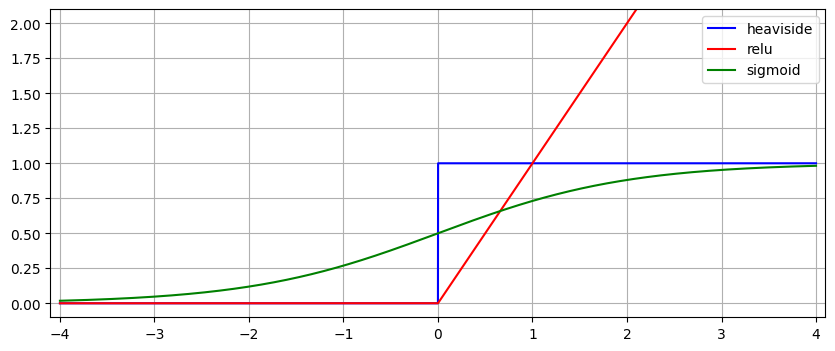

In [76]:
import matplotlib.pyplot as plt
import math

def heaviside(x):
    return 0.0 if x < 0.0 else 1.0

def relu(x):
    return 0.0 if x < 0.0 else x

def sigmoid(x):
    return 1.0 / (1.0 + math.exp(-x))

X = np.linspace(-4.0, 4.0, 10000)
heaviside_y = np.vectorize(heaviside)(X)
relu_y = np.vectorize(relu)(X)
sigmoid_y = np.vectorize(sigmoid)(X)

plt.figure(figsize=(10, 4))

plt.plot(X, heaviside_y, "b-", label="heaviside")
plt.plot(X, relu_y, "r-", label="relu")
plt.plot(X, sigmoid_y, "g-", label="sigmoid")

plt.legend()
plt.axis([-4.1, 4.1, -0.1, 2.1])
plt.grid()
plt.show()

## 10

In [77]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [78]:
import matplotlib.pyplot as plt

def plot_digit(data):
    data = data.reshape(28, 28)
    plt.imshow(data, cmap="binary")
    plt.axis("off")
    plt.show()

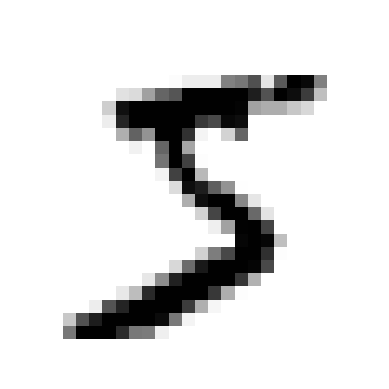

In [79]:
plot_digit(X_train[0])

In [80]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])
model.summary()

/home/julio/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [82]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 142us/step - accuracy: 0.8366 - loss: 0.6171 - val_accuracy: 0.9312 - val_loss: 0.2573
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9164 - loss: 0.2945 - val_accuracy: 0.9460 - val_loss: 0.2016
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9315 - loss: 0.2414 - val_accuracy: 0.9544 - val_loss: 0.1714
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9412 - loss: 0.2067 - val_accuracy: 0.9592 - val_loss: 0.1509
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9483 - loss: 0.1806 - val_accuracy: 0.9630 - val_loss: 0.1355
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9541 - loss: 0.1600 - val_accuracy: 0.9676 - val_loss: 0.1237
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9589 - loss: 0.1432 - val_accuracy: 0.9690 - val_loss: 0.1148
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9628 - loss: 0.1292 

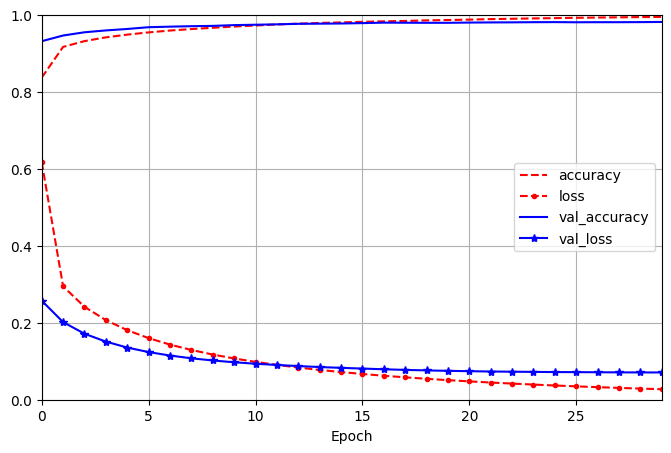

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# xlim: 0-29 -> there are 30 epochs
# ylim: 0-1 -> just because the values ranges from 0 to 1
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

In [84]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9772 - loss: 0.0752  


[0.07517784088850021, 0.9771999716758728]

### Trying to improve the model

In [86]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=512)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

In [87]:
random_search_tuner = kt.RandomSearch(build_model, objective="val_accuracy", max_trials=6, overwrite=True,
                                     directory="mnist", project_name="rnd_search_minst", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Trial 6 Complete [00h 00m 43s]
val_accuracy: 0.9387999773025513

Best val_accuracy So Far: 0.9688000082969666
Total elapsed time: 00h 02m 51s


In [92]:
best_model = random_search_tuner.get_best_models(num_models=1)[0]

In [91]:
top_params = random_search_tuner.get_best_hyperparameters(num_trials=1)[0]
top_params.values

{'n_hidden': 4,
 'n_neurons': 137,
 'learning_rate': 0.00905127409782462,
 'optimizer': 'adam'}

In [93]:
best_model.fit(X_train_full, y_train_full, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9572 - loss: 0.2044
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9702 - loss: 0.1202
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9673 - loss: 0.1378
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9598 - loss: 0.1857
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9698 - loss: 0.1288
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9681 - loss: 0.1469
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9721 - loss: 0.1192
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9622 - loss: 0.1747
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9591 - loss: 0.2289
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9671 - loss: 0.1653


In [95]:
best_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.9582 - loss: 0.2271


[0.22711457312107086, 0.9581999778747559]